# Day 3. 실습 1
- 예제코드

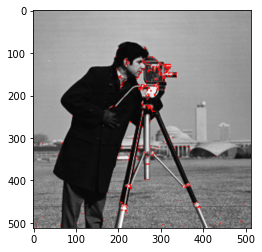

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename = 'camera.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255, 0,0]
plt.imshow(img,'gray')
plt.show()

# SIFT 추출 코드

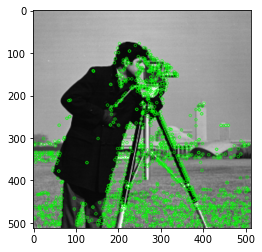

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('camera.png')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img2=cv.drawKeypoints(gray,kp,None,color=(0,255,0))
plt.imshow(img2,'gray')
plt.show()


# ORB 추출 코드

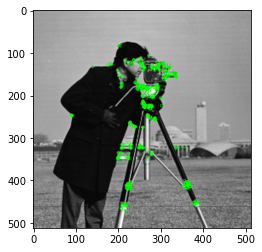

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('camera.png',0)

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# draw only keypoints location, not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2,'gray')
plt.show()

# 실습 2: ORB를 이용한 정합 함수(1)

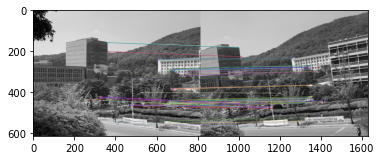

In [11]:
import cv2 as cv
img1 = cv.imread('b1.png',cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread('b2.png',cv.IMREAD_GRAYSCALE) 	# trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 30 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3,'gray')
plt.show()


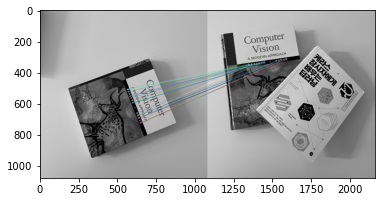

In [13]:
import cv2 as cv
img1 = cv.imread('p1.jpg',cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread('p2.jpg',cv.IMREAD_GRAYSCALE) 	# trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 30 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:30],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3,'gray')
plt.show()

